In [5]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


In [43]:
# !pip install jiwer
import os
import glob
import pandas as pd
import os
from jiwer import wer,cer
import seaborn as sns
import matplotlib.pyplot as plt

# OpenSmile Features

In [ ]:
!pip install opensmile
import opensmile
import pandas as pd
import numpy as np
import glob
import os
import pickle
import random
import librosa
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
    num_workers=24,
)
scaler = StandardScaler()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.0/996.0 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 19.5 MB/s eta 0:00:00


In [ ]:
test_df = pd.read_excel('/content/drive/MyDrive/local_speech/others/IUT_bhasha_bichitra/orig_iut_folds/fix_dataset/final/test/test.xlsx')
test_audios = list(test_df['file_name'])
test_audios

In [ ]:
directory_path = "/content/drive/MyDrive/local_speech/others/IUT_bhasha_bichitra/orig_iut_folds/fix_dataset/final/test/"
audio_files = []
for audio_path in test_audios:
    audio_files.extend(glob.glob(os.path.join(directory_path, audio_path)))

test_smile_data = smile.process_files(audio_files)
test_smile_data.to_csv('test_smile_features.csv')

Opensmile + WER

In [23]:
test_smile_data = pd.read_csv('/content/Ben10_test_smile_features.csv')
test_smile_data['id'] = test_smile_data['file'].apply(lambda x:x.split('/')[-1])
test_smile_data

,file,start,end,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,...,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,id
0,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:15.840000,36.376614,0.231050,27.581322,35.440330,44.928368,17.347046,219.84134,...,0.021276,0.057088,2.842704,2.471483,0.275385,0.320871,0.134839,0.254138,-25.028046,test_barishal (1).wav
1,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:15.776000,37.462574,0.166951,30.994675,38.146860,42.047256,11.052582,219.77531,...,0.009109,0.027334,2.538071,2.800764,0.209091,0.178743,0.136098,0.207633,-35.479717,test_barishal (10).wav
2,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:15.772000,35.707676,0.145572,32.137405,34.942020,39.326057,7.188652,207.74269,...,0.003383,0.221433,3.680203,2.611465,0.285366,0.238615,0.087500,0.101609,-21.925947,test_barishal (100).wav
3,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:16.036000,33.351220,0.184173,28.993763,32.896667,36.376915,7.383152,177.74731,...,0.018133,0.111348,2.559301,2.567314,0.234634,0.228164,0.152222,0.222799,-26.867687,test_barishal (101).wav
4,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:21.756000,33.618256,0.181184,28.935028,32.727417,38.134970,9.199944,197.81410,...,0.004805,0.117538,3.449862,3.828413,0.177349,0.183547,0.073571,0.071054,-27.933810,test_barishal (102).wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:16.096000,29.642584,0.101484,27.966114,29.605284,31.405611,3.439497,140.18391,...,-0.008248,0.249347,3.233831,2.184769,0.250857,0.266816,0.191471,0.280924,-16.655079,test_tangail (95).wav
1678,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:15.264000,29.692514,0.133938,27.473810,29.323471,31.273006,3.799196,174.89821,...,-0.008558,0.258463,4.065574,2.633312,0.282750,0.255431,0.088824,0.106046,-15.541400,test_tangail (96).wav
1679,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:15.360000,29.481890,0.117294,27.815834,29.254791,31.058449,3.242615,276.75092,...,-0.007363,0.281631,4.039088,2.483660,0.270000,0.242899,0.124118,0.187258,-15.272749,test_tangail (97).wav
1680,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:17.184000,30.287666,0.152090,27.136518,29.899971,32.480580,5.344061,231.44789,...,-0.012533,0.301458,3.669190,2.746932,0.262766,0.185870,0.084889,0.058104,-16.248068,test_tangail (98).wav


In [15]:
df = pd.read_csv('/content/drive/MyDrive/local_speech/others/IUT_bhasha_bichitra/orig_iut_folds/fix_dataset/benchmarks/Foundational Models/tugstugi_model_test_inference.csv')
df = df.sort_values(by='wer', ascending=True)
df

,id,district,prediction,transcriptions,wer,cer
1575,test_tangail (121).wav,tangail,তো আমার মনে হয় ওই বিল্ডিং করার জন্যই কেউ চক্রা...,তো আমার মনে হয় ওই বিল্ডিং করার জন্যই কেউ চক্রা...,0.171429,0.033898
1644,test_tangail (65).wav,tangail,অভিনয় সবকিছু ছেড়ে দেওয়ার একটা অভিনয় কিন্তু যেট...,অভিনয় সবকিছু ছেড়ে দেওয়ার একটা অভিনয় কিন্তু যেট...,0.214286,0.061224
1667,test_tangail (86).wav,tangail,বুঝতে পারে পরে আস্তে আস্তে হালকা হালকা নাড়াচাড়...,বুঝতে পারে পরে আস্তে আস্তে হালকা হালকা নাড়া-চা...,0.242424,0.076923
1592,test_tangail (18).wav,tangail,আগায় যাইতে থাকে তারা বড় বড় ডিল করতে থাকে নতুন ...,"আগায় যাইতে থাকে, তারা বড় বড় ডিল করতে থাকে। নতু...",0.258065,0.091954
1631,test_tangail (53).wav,tangail,পাই যে প্যাটেল পাই প্যাটেল ও আর কি কখনো এই ইন্...,"পাই যে প্যাটেল, পাই প্যাটেল ও আর কি কহনও এই ইন...",0.285714,0.126263
...,...,...,...,...,...,...
587,test_kishoreganj (87).wav,kishoreganj,হেজ হেজ হেজ হেজ হেজ হেজ হেজ হেজ হেজ হেজ হেজ হে...,হেদের খেজুর এমন হ কেল্লেইগ্যা? হেদি হেমুন কেল্...,1.980000,1.164751
507,test_kishoreganj (200).wav,kishoreganj,ঘাটের গাড়িতে দাঁড়িয়ে শিল্পের জন্য স্কুল আছে আর...,<> সে নাকি বিদেশে <>,5.400000,6.700000
504,test_kishoreganj (199).wav,kishoreganj,ভয় ফাজতে তো ভয় ফাজতে তো আমি এখনই কথাবার সাথে ...,<> মাইরালছি। <>,10.000000,9.800000
158,test_chittagong (148).wav,chittagong,তুই আমার ন্যায় হো এত লাই এতক্ষণ ধর্মে যেন ফ্রে...,দদ <>,11.500000,22.600000


In [24]:
merged_df = pd.merge(test_smile_data, df,on='id')
merged_df

,file,start,end,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,...,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,id,district,prediction,transcriptions,wer,cer
0,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:15.840000,36.376614,0.231050,27.581322,35.440330,44.928368,17.347046,219.84134,...,0.320871,0.134839,0.254138,-25.028046,test_barishal (1).wav,barishal,তিন গাছ তিন গাছ ছয় গাছ দেবে রাজার রাজার জন্মের...,তিন গাছ তিন গাছ ছয় গাছ দেবে। তুই আয় এই জাগা <>...,0.823529,0.581921
1,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:15.776000,37.462574,0.166951,30.994675,38.146860,42.047256,11.052582,219.77531,...,0.178743,0.136098,0.207633,-35.479717,test_barishal (10).wav,barishal,গরম লাগে চুরি কিছু কি আছে না এতে গরম লাগে তো হ...,গরম লাগে <> কী আছে? কই দেহি। ও পড়বে হোনেন না? ...,0.825000,0.674157
2,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:15.772000,35.707676,0.145572,32.137405,34.942020,39.326057,7.188652,207.74269,...,0.238615,0.087500,0.101609,-21.925947,test_barishal (100).wav,barishal,যত বছর যখন এত এ গাছ এই যে নেবারি কাটলাম এই গাছ,চেড়তে চেড়তে আগা বাইরাইয়া যায়। গত বছছর যহন এতো ...,0.814815,0.680672
3,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:16.036000,33.351220,0.184173,28.993763,32.896667,36.376915,7.383152,177.74731,...,0.228164,0.152222,0.222799,-26.867687,test_barishal (101).wav,barishal,কাম করা ভালো এখন এই যে কিনছি এর কারণ আছে কি লি...,"ওরে আর, ওয়া তো যেকালে পারছো হেইকালে গাছে ওটছো ...",0.956522,0.684685
4,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:21.756000,33.618256,0.181184,28.935028,32.727417,38.134970,9.199944,197.81410,...,0.183547,0.073571,0.071054,-27.933810,test_barishal (102).wav,barishal,গাছের কাজ জগৎ দেখতে বাইরে অন্য কিছু করার চিন্ত...,"মোর এট্টা ইসাব, কী? চা আর খামু না অনেক খাইছি। ...",0.796610,0.632047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:16.096000,29.642584,0.101484,27.966114,29.605284,31.405611,3.439497,140.18391,...,0.266816,0.191471,0.280924,-16.655079,test_tangail (95).wav,tangail,ছবিটা আসলে দেখলে মানে ভালো লাগব না তারপরে আমি ...,সো ছবিটা আসলে দেখলে মানে ভাল্লাগবো অনেক। তারপর...,0.588235,0.240642
1678,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:15.264000,29.692514,0.133938,27.473810,29.323471,31.273006,3.799196,174.89821,...,0.255431,0.088824,0.106046,-15.541400,test_tangail (96).wav,tangail,পরে ইদানীং আমার কেন্দ্র জানি মনে হলে যে এই ছবি...,পরে ইদানীং আমার কেমনে জানি মনে অইলো যে এই ছবিড...,0.511628,0.251101
1679,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:15.360000,29.481890,0.117294,27.815834,29.254791,31.058449,3.242615,276.75092,...,0.242899,0.124118,0.187258,-15.272749,test_tangail (97).wav,tangail,বলিউডের অন্যতম প্রভাবশালী ডিরেক্টর সঞ্জয় লেলাব...,বলিউডের অন্যতম এক প্রভাবশালী ডিরেক্টর সঞ্জয় লী...,0.575758,0.228155
1680,/content/drive/MyDrive/local_speech/others/IUT...,0 days,0 days 00:00:17.184000,30.287666,0.152090,27.136518,29.899971,32.480580,5.344061,231.44789,...,0.185870,0.084889,0.058104,-16.248068,test_tangail (98).wav,tangail,এই ছবিতে আরেকটা বিষয় আছে এই ছবিতে আসলে মানুষ ত...,<> মুটামুটি এই চারজন বাদে আর কেউ নেই। আর এই ছব...,0.574468,0.300429


In [36]:
Districts = ['chittagong','kishoreganj','narsingdi','narail', 'rangpur','tangail', 'habiganj', 'barishal', 'sylhet','sandwip']
wer_results = []
cer_results = []
metrics = test_smile_data.columns[3:91]

for i in range(len(Districts)):
    filtered_df = merged_df[merged_df['district']==Districts[i]]
    for j in range(len(metrics)):
        corr_wer = filtered_df[metrics[j]].corr(filtered_df['wer'])
        corr_cer = filtered_df[metrics[j]].corr(filtered_df['cer'])

        wer_result = {
            'WER(Districts)': Districts[i],
            'Opensmile metrics': metrics[j],
            'correlation with WER': corr_wer
        }
        cer_result = {
            'CER(Districts)': Districts[i],
            'Opensmile metrics': metrics[j],
            'correlation with CER': corr_cer
        }

        # Append the dictionary to the results list
        wer_results.append(wer_result)
        cer_results.append(cer_result)

wer_results_df = pd.DataFrame(wer_results)
cer_results_df = pd.DataFrame(cer_results)
wer_results_df

,WER(Districts),Opensmile metrics,correlation with WER
0,chittagong,F0semitoneFrom27.5Hz_sma3nz_amean,0.047538
1,chittagong,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,-0.020506
2,chittagong,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,0.037533
3,chittagong,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,0.059338
4,chittagong,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,0.055940
...,...,...,...
875,sandwip,MeanVoicedSegmentLengthSec,-0.315843
876,sandwip,StddevVoicedSegmentLengthSec,-0.260073
877,sandwip,MeanUnvoicedSegmentLength,0.246343
878,sandwip,StddevUnvoicedSegmentLength,0.236274


In [56]:
correlation_matrix = wer_results_df.pivot(index='WER(Districts)', columns='Opensmile metrics', values='correlation with WER')

correlation_matrix.to_csv('Correlation_matrix_wer_smile.csv',index=False)
correlation_matrix

Opensmile metrics,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,slopeUV500-1500_sma3nz_amean,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxUV_sma3nz_amean,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm
WER(Districts),,,,,,,,,,,,,,,,,,,,,
barishal,0.265838,-0.207928,0.000018,0.261184,0.147673,0.242967,0.332972,-0.264838,0.070178,-0.004097,...,0.063595,-0.116717,0.167273,0.149466,-0.180852,0.175543,0.132067,0.224601,0.136040,0.241239
chittagong,0.047538,-0.028717,-0.016722,0.048878,0.037533,0.059338,0.055940,-0.037630,-0.020506,-0.012717,...,-0.009985,0.000217,-0.023634,0.097497,-0.068456,-0.037403,0.139138,-0.044739,0.023690,0.063128
habiganj,0.040854,0.285952,0.189286,0.297930,-0.048203,0.054338,0.090252,0.185684,0.314890,0.070000,...,-0.138608,0.227362,0.229560,-0.251708,-0.050728,0.460279,0.477885,-0.038046,0.473702,-0.078396
kishoreganj,0.278310,0.018158,-0.023369,0.142012,0.152801,0.258038,0.382463,-0.014295,0.004901,-0.074414,...,0.215203,-0.064415,0.009950,0.483184,0.075917,-0.142004,-0.220592,-0.091939,-0.230681,0.741443
narail,0.282565,0.118492,-0.060470,0.053298,0.204253,0.204237,0.291510,0.051498,0.004547,-0.117956,...,-0.342686,0.159201,-0.167497,0.275793,-0.120956,-0.025321,-0.364375,0.122826,-0.330342,0.085529
narsingdi,0.708016,0.203978,0.178510,0.504208,0.705621,0.706683,0.699207,0.124162,0.397740,0.111560,...,-0.017469,0.549268,-0.464761,0.506875,-0.209990,-0.214275,-0.505285,0.226070,-0.462948,0.026556
rangpur,0.230279,0.093853,-0.033889,0.031167,0.191583,0.194251,0.216068,0.106901,-0.080830,-0.132437,...,0.016509,0.153598,-0.076611,0.252318,0.183917,-0.054605,-0.099779,0.073117,-0.096459,0.063381
sandwip,0.040396,0.238387,0.100004,0.096416,-0.018601,-0.010683,0.067979,0.126946,0.114199,-0.025176,...,0.013708,-0.145371,0.140537,0.116489,-0.055037,0.068553,-0.102188,-0.117692,-0.101490,0.012045
sylhet,0.147211,0.042872,-0.068497,-0.165416,0.164508,0.111587,0.067778,0.045923,-0.143495,-0.047675,...,0.162249,0.075988,-0.055322,0.214194,-0.130567,0.123798,0.082800,-0.007503,0.089310,0.100571


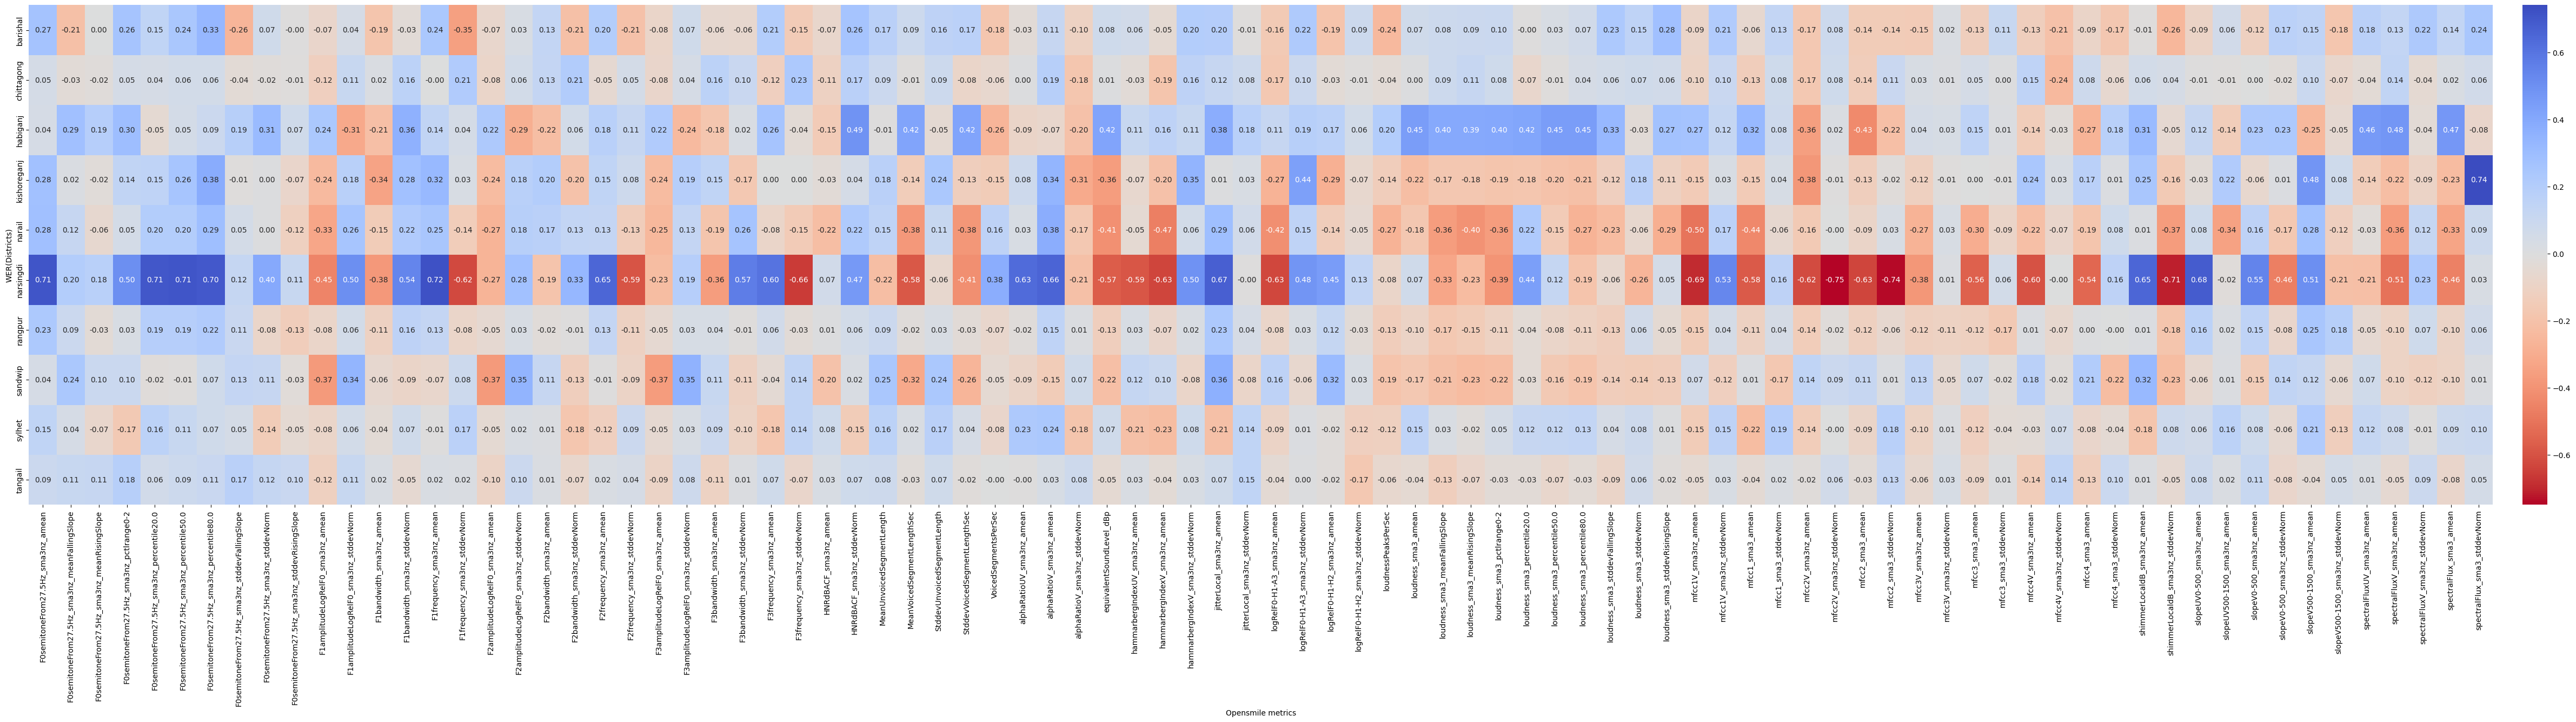

In [57]:
plt.figure(figsize=(70, 12))  # Optional: Adjust the figure size
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt='.2f',
                      cbar_kws={"pad": 0.01})

# Customize the plot
# heatmap.set_xlabel('Smile Features')
# heatmap.set_ylabel('WER')

plt.savefig('Correlation_Heatmap_wer_Smile.pdf',bbox_inches='tight',dpi=100)
plt.show()

In [58]:
correlation_matrix = cer_results_df.pivot(index='CER(Districts)', columns='Opensmile metrics', values='correlation with CER')

correlation_matrix.to_csv('Correlation_matrix_cer_Smile.csv',index=False)
correlation_matrix

Opensmile metrics,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,slopeUV500-1500_sma3nz_amean,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,spectralFluxUV_sma3nz_amean,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm
CER(Districts),,,,,,,,,,,,,,,,,,,,,
barishal,0.486483,-0.004454,0.014514,0.387614,0.318434,0.434343,0.564776,-0.114975,0.134645,-0.023151,...,0.082345,-0.035262,0.112421,0.185858,-0.140842,0.108191,0.097409,0.283443,0.090909,0.249442
chittagong,0.040294,-0.016865,-0.017532,0.048843,0.031307,0.053299,0.051265,-0.024214,-0.026960,-0.011711,...,-0.023312,-0.001570,-0.023944,0.092169,-0.057636,-0.032144,0.134531,-0.042725,0.033504,0.038105
habiganj,0.051298,0.439471,0.309205,0.547938,-0.095819,0.073673,0.159657,0.303569,0.488540,0.199301,...,-0.338744,0.327315,0.299017,-0.363883,-0.005932,0.551821,0.629917,0.024247,0.626579,-0.011197
kishoreganj,0.288992,0.019694,-0.036810,0.126596,0.165800,0.276325,0.381989,-0.010827,-0.008185,-0.084412,...,0.212047,-0.058688,0.009421,0.478727,0.054092,-0.132221,-0.214217,-0.104531,-0.220117,0.728315
narail,0.322451,0.024353,-0.101445,0.109901,0.224480,0.282919,0.373460,-0.033186,-0.049478,-0.144668,...,-0.436393,0.068029,-0.115125,0.225731,-0.030380,0.200622,-0.204370,-0.102378,-0.113143,-0.176452
narsingdi,0.651740,0.236206,0.246681,0.533674,0.627328,0.656254,0.655573,0.134443,0.406334,0.180627,...,-0.065689,0.536247,-0.439085,0.431380,-0.207168,-0.148509,-0.358392,0.255714,-0.335656,0.088996
rangpur,0.211718,0.049054,-0.098833,-0.069618,0.239491,0.194598,0.168062,0.075782,-0.189275,-0.188254,...,-0.066065,0.234870,-0.165589,0.181517,0.104080,0.015403,-0.106318,0.022579,-0.057677,-0.044281
sandwip,0.091781,0.243822,0.155214,0.092391,0.041370,0.067979,0.099161,0.129070,0.129225,0.020900,...,0.027167,-0.145277,0.129955,0.150389,-0.093337,0.097003,-0.098274,-0.068800,-0.091180,0.005578
sylhet,0.253605,0.040890,-0.017462,-0.110421,0.259512,0.210597,0.179758,0.037774,-0.113002,-0.002906,...,0.116061,0.078208,-0.054529,0.238579,-0.172377,0.194842,0.140861,-0.030191,0.149856,0.069423


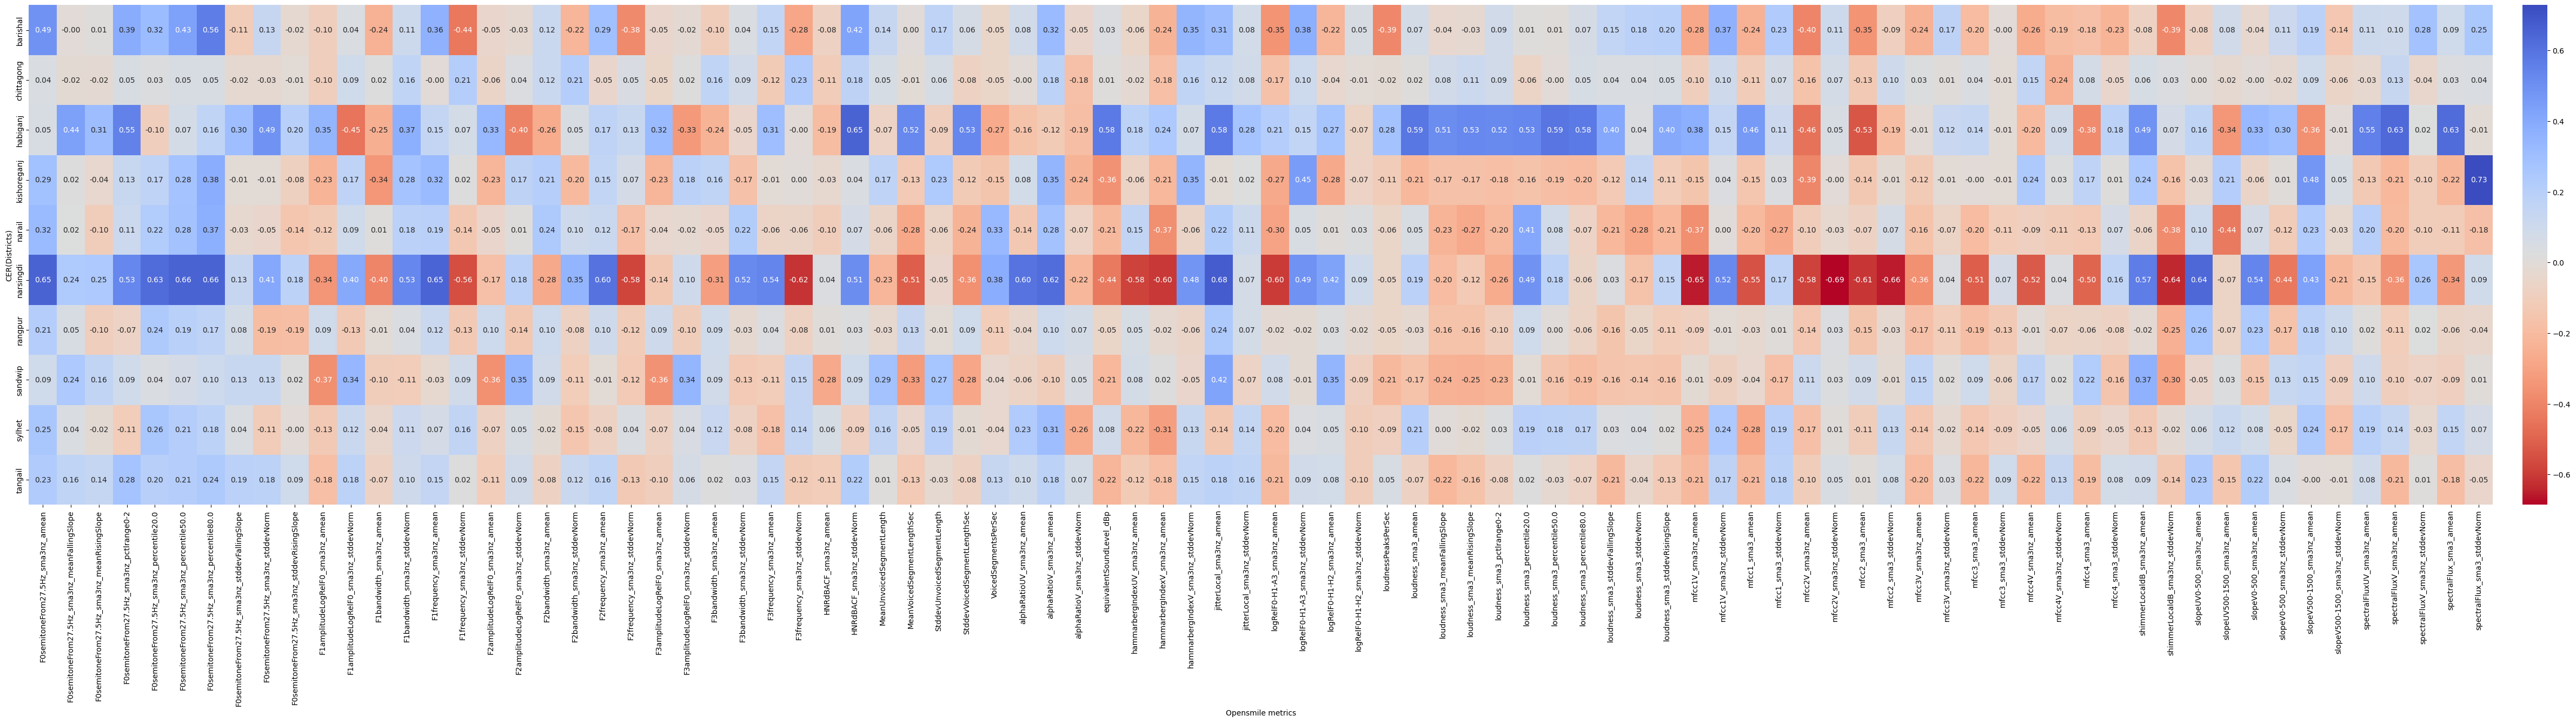

In [59]:
plt.figure(figsize=(70, 12))  # Optional: Adjust the figure size
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt='.2f',
                      cbar_kws={"pad": 0.01})

# Customize the plot
# heatmap.set_xlabel('Smile Features')
# heatmap.set_ylabel('CER')

plt.savefig('Correlation_Heatmap_cer_Smile.pdf',bbox_inches='tight',dpi=100)
plt.show()